In [1]:
import time
start_time=time.time()

In [2]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
from scipy.fftpack import fft
import pandas as pd
import math
import sys
import os
from PIL import Image
import seaborn as sns
from downsample import downsample


Sigma

In [3]:
#ARCHIVO
FitsFile= 'n604halphasigma'
hdul=fits.open(FitsFile + '.fits')

In [4]:
#image_data[4]

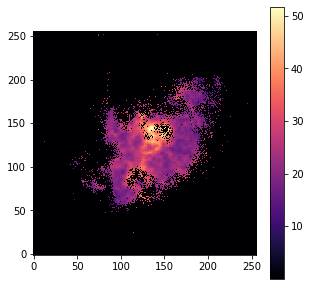

In [5]:
#IMAGEN S
fig, ax = plt.subplots(figsize=(5, 5))
image_data=hdul[0].data
plt.imshow(image_data, cmap='magma')
plt.colorbar()
#plt.clim(2,100) 

plt.gca().invert_yaxis()#Ajustar Tabla General
#plt.gca().invert_xaxis()

In [6]:
#TABLA DATOS
sig=hdul[0].data
df=pd.DataFrame(sig)

In [7]:
dsig=df.stack().reset_index().rename(columns={'level_0':'Y', 'level_1':'X', 0:'Sig'})
dsig.describe()

,Y,X,Sig
count,65536.000000,65536.000000,6.553600e+04
mean,127.500000,127.500000,3.607881e+00
std,73.900834,73.900834,8.906863e+00
min,0.000000,0.000000,1.291134e-08
25%,63.750000,63.750000,1.291134e-08
50%,127.500000,127.500000,1.291134e-08
75%,191.250000,191.250000,1.291134e-08
max,255.000000,255.000000,5.164933e+01


In [8]:
#dsig.Sig=dsig.Sig.values[::-1]
#dsig.describe()

Brillo emisión

In [9]:
#ARCHIVO
FitsFile= 'r623map1peak'
hdul=fits.open(FitsFile + '.fits')

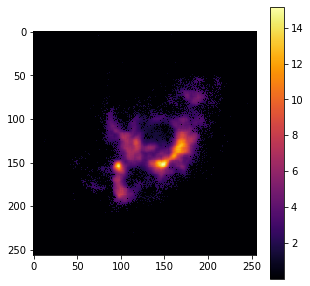

In [10]:
#IMAGEN
fig, ax = plt.subplots(figsize=(5, 5))


image_data=hdul[0].data
plt.imshow(image_data, cmap='inferno')
plt.colorbar()
#plt.gca().invert_yaxis()
#plt.gca().invert_xaxis()

In [11]:
#TABLA DATOS
flx=hdul[0].data
df=pd.DataFrame(flx)

In [12]:
dffx=df.stack().reset_index().rename(columns={'level_0':'Y', 'level_1':'X', 0:'I'})
dffx.describe()

,Y,X,I
count,65536.000000,65536.000000,6.553600e+04
mean,127.500000,127.500000,5.889378e-01
std,73.900834,73.900834,1.665959e+00
min,0.000000,0.000000,3.787646e-09
25%,63.750000,63.750000,3.787646e-09
50%,127.500000,127.500000,3.787646e-09
75%,191.250000,191.250000,3.787646e-09
max,255.000000,255.000000,1.515018e+01


Velocidad Radial

In [13]:
#ARCHIVO
FitsFile= 'r623map1vel'
#FitsFile= 'n604halphasigma'
hdul=fits.open(FitsFile + '.fits')

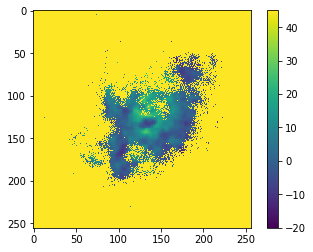

In [14]:
#IMAGEN
image_data=hdul[0].data
plt.imshow(image_data, cmap='viridis')
plt.colorbar()
plt.clim(-20,45) 

#plt.gca().invert_yaxis()
#plt.gca().invert_xaxis()

In [15]:
#TABLA DATOS
vel=hdul[0].data
df=pd.DataFrame(vel)
#dfv=df.stack()
#dfv

In [16]:
dfvr=df.stack().reset_index().rename(columns={'level_0':'Y', 'level_1':'X', 0:'RV'})
dfvr.describe()

,Y,X,RV
count,65536.000000,65536.000000,65536.000000
mean,127.500000,127.500000,335.500406
std,73.900834,73.900834,139.319611
min,0.000000,0.000000,-16.693176
25%,63.750000,63.750000,393.980011
50%,127.500000,127.500000,393.980011
75%,191.250000,191.250000,393.980011
max,255.000000,255.000000,393.980011


Tabla General

In [17]:
data=dfvr
data['I']=dffx.I
data['Sig']=dsig.Sig
data.describe()

,Y,X,RV,I,Sig
count,65536.000000,65536.000000,65536.000000,6.553600e+04,6.553600e+04
mean,127.500000,127.500000,335.500406,5.889378e-01,3.607881e+00
std,73.900834,73.900834,139.319611,1.665959e+00,8.906863e+00
min,0.000000,0.000000,-16.693176,3.787646e-09,1.291134e-08
25%,63.750000,63.750000,393.980011,3.787646e-09,1.291134e-08
50%,127.500000,127.500000,393.980011,3.787646e-09,1.291134e-08
75%,191.250000,191.250000,393.980011,3.787646e-09,1.291134e-08
max,255.000000,255.000000,393.980011,1.515018e+01,5.164933e+01


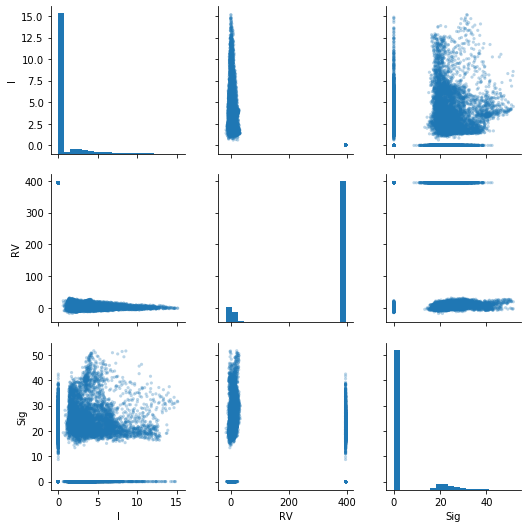

In [18]:
sns.pairplot(data, 
             vars=["I","RV","Sig"], 
             diag_kind='hist',  
             plot_kws=dict(alpha=0.3, s=10, edgecolor='none'),
             diag_kws=dict(bins=20),
            )

Ajuste de datos

In [19]:
mI=data.I>data.I.mean()+0.5*data.I.std()
data=data[mI]
#my=(data.Y>75)&(data.Y<200)
#mx=(data.X>90)&(data.X<200)
#mrv=(data.RV>-100)&(data.RV<100)
#ms=(data.Sig>0)&(data.Sig<100)
#data=data[mx]
#data=data[my]
#data=data[mrv]
#data=data[ms]


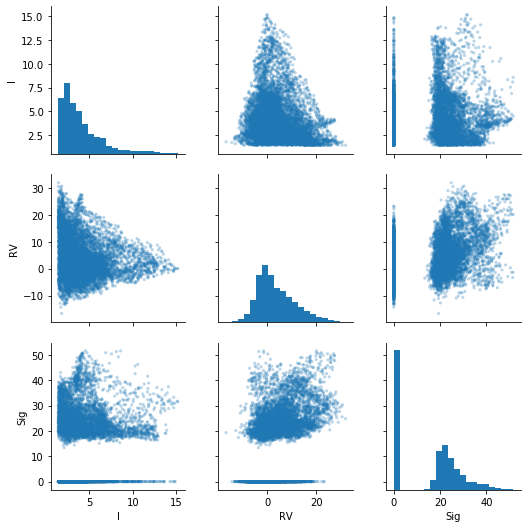

In [20]:
sns.pairplot(data, 
             vars=["I","RV","Sig"], 
             diag_kind='hist',  
             plot_kws=dict(alpha=0.3, s=10, edgecolor='none'),
             diag_kws=dict(bins=20),
            )

In [21]:
data.describe()

,Y,X,RV,I,Sig
count,9510.000000,9510.000000,9510.000000,9510.000000,9.510000e+03
mean,130.015247,138.798633,3.564254,4.017141,1.475051e+01
std,33.245833,35.100884,7.391004,2.307828,1.351118e+01
min,50.000000,45.000000,-16.693176,1.422287,1.291134e-08
25%,106.000000,109.000000,-1.850128,2.393386,1.291134e-08
50%,131.000000,139.000000,1.922028,3.357099,1.934985e+01
75%,155.000000,169.000000,8.060150,4.908373,2.449398e+01
max,206.000000,222.000000,32.009949,15.150179,5.164933e+01


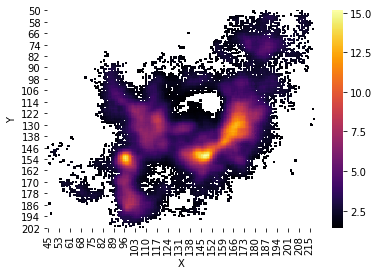

In [22]:
datal=data.copy()
#datal.I=np.log10(datal.I)
datal.X=datal.X.astype(int)
dataH_f=(datal.round(2)).pivot(index='Y', columns='X', values='I')
#fig, ax = plt.subplots(figsize=(17, 4))
sns.heatmap(dataH_f, cmap="inferno",xticklabels='auto')


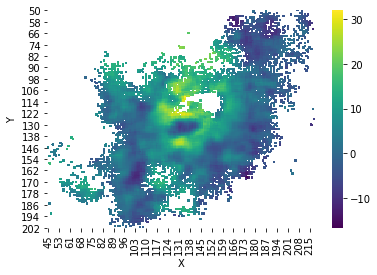

In [23]:
datal=data.copy()
dataH_rv=(datal.round(2)).pivot(index='Y', columns='X', values='RV')
sns.heatmap(dataH_rv, cmap="viridis")


In [24]:
#datal=data.copy()
dataH_s=(datal.round(2)).pivot(index='Y', columns='X', values='Sig')
#sns.heatmap(dataH_s, cmap="magma")


Downsample

In [25]:
mingoods=[1]

In [26]:
I=dataH_f.copy()
I=np.array(I)
m=pd.notna(I)

In [27]:
for mingood in zip(mingoods):
    [I],m= downsample([I],m,weights=None,mingood=mingood)

In [28]:
RV=dataH_rv.copy()
RV=np.array(RV)
m=pd.notna(RV)

In [29]:
for mingood in zip(mingoods):
    [RV],m= downsample([RV],m,weights=None,mingood=mingood)

In [30]:
Sg=dataH_s.copy()
Sg=np.array(Sg)
m=pd.notna(Sg)

In [31]:
for mingood in zip(mingoods):
    [Sg],m= downsample([Sg],m,weights=None,mingood=mingood)

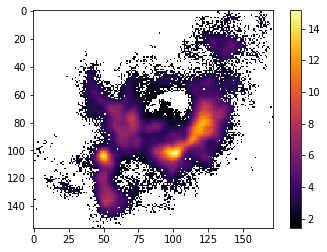

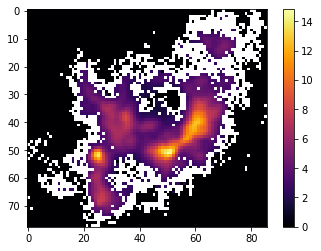

In [32]:
plt.figure(1)
plt.imshow(dataH_f, cmap='inferno')
plt.colorbar()


plt.figure(2)
plt.imshow((I), cmap='inferno')
plt.colorbar()


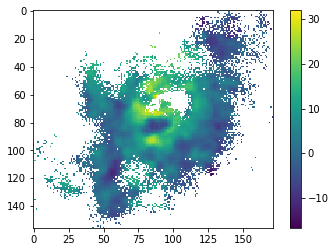

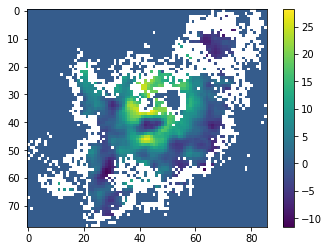

In [33]:
plt.figure(1)
plt.imshow(dataH_rv, cmap='viridis')
plt.colorbar()

plt.figure(2)
plt.imshow((RV), cmap='viridis')
plt.colorbar()

In [34]:
#plt.figure(1)
#plt.imshow(dataH_s, cmap='magma')
#plt.colorbar()

#plt.figure(2)
#plt.imshow((Sg), cmap='magma')
#plt.colorbar()

In [35]:
Ip=pd.DataFrame(I)
dfi=Ip.stack().reset_index().rename(columns={'level_0':'Y', 'level_1':'X', 0:'I'})

RVp=pd.DataFrame(RV)
dfrv=RVp.stack().reset_index().rename(columns={'level_0':'Y', 'level_1':'X', 0:'RV'})

Sgp=pd.DataFrame(Sg)
dfs=Sgp.stack().reset_index().rename(columns={'level_0':'Y', 'level_1':'X', 0:'Sig'})


df=pd.concat([dfrv,dfi.I, dfs.Sig],axis=1)
df.describe()

,Y,X,RV,I,Sig
count,5180.000000,5180.000000,5180.000000,5180.000000,5180.000000
mean,39.253861,41.101544,1.189999,1.522752,5.497347
std,22.766370,25.429375,4.452803,2.596184,10.353084
min,0.000000,0.000000,-11.585000,0.000000,0.000000
25%,19.000000,19.000000,0.000000,0.000000,0.000000
50%,40.000000,40.000000,0.000000,0.000000,0.000000
75%,58.000000,63.000000,0.000000,3.058125,0.000000
max,77.000000,85.000000,28.155000,14.815000,50.990000


In [36]:
#mx=(df.X<40)&(df.X>4)
#df=df[mx]

#my=(df.Y<55)&(df.Y>10)
#df=df[my]

mI=df.I>df.I.mean()+0.05*df.I.std()
df=df[mI]

#ms=(df.Sig>0)
#df=df[ms]

df.describe()

,Y,X,RV,I,Sig
count,1622.000000,1622.000000,1622.000000,1622.000000,1622.000000
mean,41.466091,44.974723,3.559222,4.842105,17.158661
std,14.020423,15.737121,7.096471,2.334820,11.504247
min,2.000000,11.000000,-11.585000,1.655000,0.000000
25%,32.000000,31.000000,-1.606875,3.255625,6.550000
50%,42.000000,45.000000,1.958750,4.171250,19.717500
75%,51.000000,59.750000,7.538750,5.917500,24.030000
max,73.000000,75.000000,28.155000,14.815000,50.990000


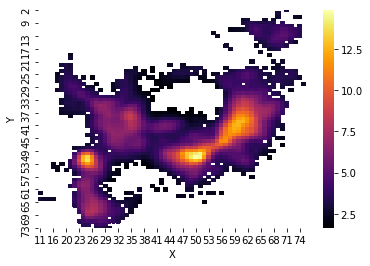

In [37]:
datal=df.copy()
dataH_f2=(datal.round(2)).pivot(index='Y', columns='X', values='I')
sns.heatmap(dataH_f2, cmap="inferno")


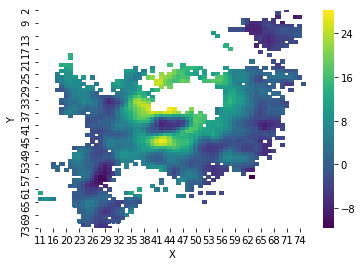

In [38]:
datal=df.copy()
dataH_rv2=(datal.round(2)).pivot(index='Y', columns='X', values='RV')
sns.heatmap(dataH_rv2, cmap="viridis")


In [39]:
#datal=df.copy()
#dataH_s2=(datal.round(2)).pivot(index='Y', columns='X', values='Sig')
#sns.heatmap(dataH_s2, cmap="magma")


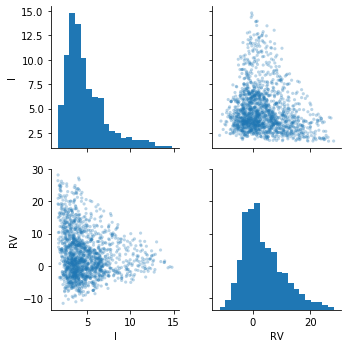

In [40]:
sns.pairplot(df, 
             vars=["I","RV"], 
             diag_kind='hist',  
             plot_kws=dict(alpha=0.3, s=10, edgecolor='none'),
             diag_kws=dict(bins=20),
            )

In [41]:
print("--- %s seconds ---" % (time.time()-start_time))

--- 31.95665717124939 seconds ---


In [44]:
df.to_csv('604.TAURUS.Ha.csv')